### Importing Libraries

In [ ]:
from datetime import date
import os
import numpy as np
import pandas as pd
#!pip install geopandas
import geopandas as gpd

from sklearn.model_selection import KFold

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import r2_score

# To avoid unnecessary warnings in the code
import warnings
warnings.filterwarnings('ignore')

### Mounting Google Drive

In [ ]:
try:
  from google.colab import drive
  IN_COLAB = True
except:
  IN_COLAB = False 
  os.chdir("F:\My Drive\Shared\CS 498 Projects\Final Project\Data")
if IN_COLAB:
  drive.mount('/content/drive')
  os.chdir("/content/drive/My Drive/Shared/CS 498 Projects/Final Project/Data")
df_data = pd.read_csv('Illinois/Cleaned_Weather/all_data@IL_1950-2019.csv',
                      sep=',',na_values=-99)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Adding latitude and longitude of counties' centroid as columns

In [ ]:
gdf = gpd.read_file('Illinois/GIS Files/Illinois_Counties_GCS_WGS84.shp')
adjacent={}
Latitude=[]
Longitude=[]
for i in range(len(gdf.index)):
 Latitude.append(gdf.iloc[i].geometry.centroid.y)
 Longitude.append(gdf.iloc[i].geometry.centroid.x)
df_county_lat = pd.DataFrame({'Latitude': Latitude,'Longitude':Longitude},
                             index=gdf.iloc[:].COUNTY_NAM)

In [ ]:
df_county_lat['County'] = df_county_lat.index
df_data=pd.merge(df_data,df_county_lat)
df_data

,Year,County,SeasonalPrep,SeasonalTmax,SeasonalTmin,SeasonalAvgTmax,SeasonalAvgTmin,WetDays,DaysA30,DaysB10,DaysB_2,GDD,Value_soybean,Value_corn,Latitude,Longitude
0,1950,ADAMS,481.046667,35.023333,-0.991667,25.564627,13.324800,57,28,42,0,2708.500834,28.0,55.0,39.987850,-91.188437
1,1951,ADAMS,513.565000,36.751667,-2.735000,25.901047,14.245191,66,42,39,1,2792.585834,28.0,60.0,39.987850,-91.188437
2,1952,ADAMS,496.356667,38.963333,-3.333333,27.672204,14.533133,52,74,43,3,2917.287500,27.0,59.0,39.987850,-91.188437
3,1953,ADAMS,334.023333,38.981667,-3.941667,28.367377,14.761357,47,86,44,2,2947.965001,22.5,52.0,39.987850,-91.188437
4,1954,ADAMS,622.691667,43.956667,0.105000,28.192687,15.860492,67,82,35,0,3000.706667,25.5,46.0,39.987850,-91.188437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2015,WOODFORD,824.823070,35.555556,-2.222222,25.933515,13.556466,71,29,41,1,2767.777778,63.4,201.0,40.788316,-89.211374
7136,2016,WOODFORD,802.973224,34.722222,1.388889,27.014268,14.822404,68,58,39,0,2927.222223,67.0,232.8,40.788316,-89.211374
7137,2017,WOODFORD,557.645509,35.833333,0.277778,26.739526,13.501821,54,50,42,0,2782.222223,60.4,214.2,40.788316,-89.211374
7138,2018,WOODFORD,534.915973,35.833333,-4.166667,27.275349,14.704007,59,65,33,4,2940.138889,64.7,223.7,40.788316,-89.211374


In [ ]:
df_County_main=pd.DataFrame()
for county in df_data["County"]:
  df_County=df_data[df_data["County"]==county]
  df_County["Value_soybean"]=df_County["Value_soybean"] - df_County["Value_soybean"].shift(-1)
  # break
  df_County_main = pd.concat([df_County_main, df_County], axis=0)
  # break
# df_County_main

In [ ]:
df_soybean=df_County_main.drop("Value_corn",axis=1)
df_soybean.dropna(inplace=True)
df_soybean

,Year,County,SeasonalPrep,SeasonalTmax,SeasonalTmin,SeasonalAvgTmax,SeasonalAvgTmin,WetDays,DaysA30,DaysB10,DaysB_2,GDD,Value_soybean,Latitude,Longitude
0,1950,ADAMS,481.046667,35.023333,-0.991667,25.564627,13.324800,57,28,42,0,2708.500834,0.0,39.987850,-91.188437
1,1951,ADAMS,513.565000,36.751667,-2.735000,25.901047,14.245191,66,42,39,1,2792.585834,1.0,39.987850,-91.188437
2,1952,ADAMS,496.356667,38.963333,-3.333333,27.672204,14.533133,52,74,43,3,2917.287500,4.5,39.987850,-91.188437
3,1953,ADAMS,334.023333,38.981667,-3.941667,28.367377,14.761357,47,86,44,2,2947.965001,-3.0,39.987850,-91.188437
4,1954,ADAMS,622.691667,43.956667,0.105000,28.192687,15.860492,67,82,35,0,3000.706667,3.0,39.987850,-91.188437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7134,2014,WOODFORD,725.754502,34.722222,-3.055556,25.065270,12.460534,73,29,56,1,2627.638889,-2.0,40.788316,-89.211374
7135,2015,WOODFORD,824.823070,35.555556,-2.222222,25.933515,13.556466,71,29,41,1,2767.777778,-3.6,40.788316,-89.211374
7136,2016,WOODFORD,802.973224,34.722222,1.388889,27.014268,14.822404,68,58,39,0,2927.222223,6.6,40.788316,-89.211374
7137,2017,WOODFORD,557.645509,35.833333,0.277778,26.739526,13.501821,54,50,42,0,2782.222223,-4.3,40.788316,-89.211374


# Linear Regression Modeling

## Linear Regression Model for Soybean

In [ ]:
df_soybean=df_data.drop("Value_corn",axis=1)
df_soybean.dropna(inplace=True)
df_soybean

,Year,County,SeasonalPrep,SeasonalTmax,SeasonalTmin,SeasonalAvgTmax,SeasonalAvgTmin,WetDays,DaysA30,DaysB10,DaysB_2,GDD,Value_soybean,Latitude,Longitude
0,1950,ADAMS,481.046667,35.023333,-0.991667,25.564627,13.324800,57,28,42,0,2708.500834,28.0,39.987850,-91.188437
1,1951,ADAMS,513.565000,36.751667,-2.735000,25.901047,14.245191,66,42,39,1,2792.585834,28.0,39.987850,-91.188437
2,1952,ADAMS,496.356667,38.963333,-3.333333,27.672204,14.533133,52,74,43,3,2917.287500,27.0,39.987850,-91.188437
3,1953,ADAMS,334.023333,38.981667,-3.941667,28.367377,14.761357,47,86,44,2,2947.965001,22.5,39.987850,-91.188437
4,1954,ADAMS,622.691667,43.956667,0.105000,28.192687,15.860492,67,82,35,0,3000.706667,25.5,39.987850,-91.188437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2015,WOODFORD,824.823070,35.555556,-2.222222,25.933515,13.556466,71,29,41,1,2767.777778,63.4,40.788316,-89.211374
7136,2016,WOODFORD,802.973224,34.722222,1.388889,27.014268,14.822404,68,58,39,0,2927.222223,67.0,40.788316,-89.211374
7137,2017,WOODFORD,557.645509,35.833333,0.277778,26.739526,13.501821,54,50,42,0,2782.222223,60.4,40.788316,-89.211374
7138,2018,WOODFORD,534.915973,35.833333,-4.166667,27.275349,14.704007,59,65,33,4,2940.138889,64.7,40.788316,-89.211374


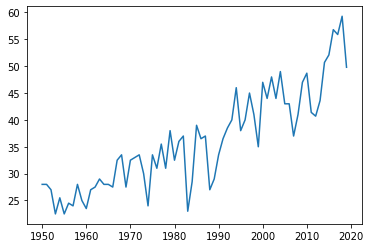

In [ ]:
df_soybean_ADAMS=df_soybean[df_soybean["County"]=="ADAMS"]
plt.plot(df_soybean_ADAMS["Year"],df_soybean_ADAMS["Value_soybean"])
plt.show()


In [ ]:
df_soybean_X=df_soybean.drop("Value_soybean",axis=1)

## Label encoder for County variable
# le = preprocessing.LabelEncoder()
# df_soybean_X["County"]=le.fit_transform(df_soybean_X["County"])

# SeasonalTmax better than SeasonalTmin
X_train_soybean, X_test_soybean, y_train_soybean, y_test_soybean = train_test_split(
    df_soybean_X[["Year","Latitude","Longitude","SeasonalTmax","GDD","WetDays","SeasonalAvgTmin","DaysA30"]],
    df_soybean["Value_soybean"], test_size=0.30, random_state=42)

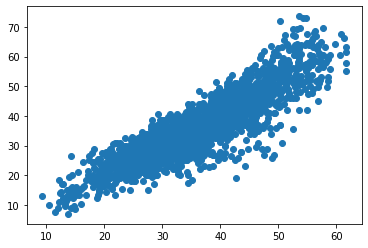

In [ ]:
LR_soybean=LinearRegression().fit(X_train_soybean, y_train_soybean)
y_pred_soybean=LR_soybean.predict(X_test_soybean)
plt.scatter(LR_soybean.predict(X_test_soybean),y_test_soybean)

In [ ]:
r2_score(y_test_soybean, y_pred_soybean)

0.7809189150605427

In [ ]:
# sns.pairplot(df_soybean);

In [ ]:
LR_soybean.coef_

array([ 0.42899838,  3.31081236, -1.08013701, -0.93997241,  0.04940137,
        0.01633868, -3.08295988, -0.1591092 ])

## Linear Regression Model for Corn

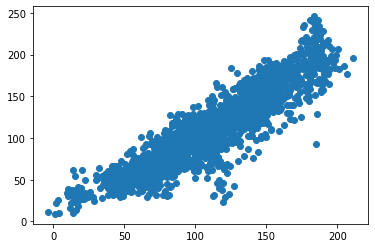

In [ ]:
df_corn=df_data.drop("Value_soybean",axis=1)
df_corn.dropna(inplace=True)
df_corn_X=df_corn.drop("Value_corn",axis=1)

# le_corn = preprocessing.LabelEncoder()
# df_corn_X["County"]=le_corn.fit_transform(df_corn_X["County"])
X_train_corn, X_test_corn, y_train_corn, y_test_corn = train_test_split(
    df_corn_X[["Year","Latitude","Longitude","SeasonalTmax","GDD","SeasonalAvgTmin","DaysA30"]],
    df_corn["Value_corn"], test_size=0.30, random_state=42)
LR_corn=LinearRegression().fit(X_train_corn, y_train_corn)
y_pred_corn=LR_corn.predict(X_test_corn)
plt.scatter(LR_corn.predict(X_test_corn),y_test_corn)

In [ ]:
df_corn

,Year,County,SeasonalPrep,SeasonalTmax,SeasonalTmin,SeasonalAvgTmax,SeasonalAvgTmin,WetDays,DaysA30,DaysB10,DaysB_2,GDD,Value_corn,Latitude,Longitude
0,1950,ADAMS,481.046667,35.023333,-0.991667,25.564627,13.324800,57,28,42,0,2708.500834,55.0,39.987850,-91.188437
1,1951,ADAMS,513.565000,36.751667,-2.735000,25.901047,14.245191,66,42,39,1,2792.585834,60.0,39.987850,-91.188437
2,1952,ADAMS,496.356667,38.963333,-3.333333,27.672204,14.533133,52,74,43,3,2917.287500,59.0,39.987850,-91.188437
3,1953,ADAMS,334.023333,38.981667,-3.941667,28.367377,14.761357,47,86,44,2,2947.965001,52.0,39.987850,-91.188437
4,1954,ADAMS,622.691667,43.956667,0.105000,28.192687,15.860492,67,82,35,0,3000.706667,46.0,39.987850,-91.188437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,2015,WOODFORD,824.823070,35.555556,-2.222222,25.933515,13.556466,71,29,41,1,2767.777778,201.0,40.788316,-89.211374
7136,2016,WOODFORD,802.973224,34.722222,1.388889,27.014268,14.822404,68,58,39,0,2927.222223,232.8,40.788316,-89.211374
7137,2017,WOODFORD,557.645509,35.833333,0.277778,26.739526,13.501821,54,50,42,0,2782.222223,214.2,40.788316,-89.211374
7138,2018,WOODFORD,534.915973,35.833333,-4.166667,27.275349,14.704007,59,65,33,4,2940.138889,223.7,40.788316,-89.211374


In [ ]:
r2_score(y_test_corn, y_pred_corn)

0.8235724795754849

In [ ]:
LR_corn.coef_
# sns.pairplot(df_corn)

array([  1.78808111,   7.61681763,  -3.10272488,  -4.60886459,
         0.17421806, -13.11465986,  -0.67621259])

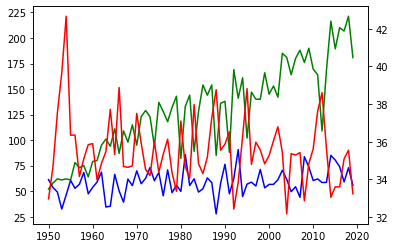

In [ ]:
corn_adams = df_corn[(df_corn['County']=='CHAMPAIGN') & (df_corn['Year']>=1950)]['Value_corn']
prep = df_corn[(df_corn['County']=='CHAMPAIGN') & (df_corn['Year']>=1950)]['SeasonalPrep']*0.1
tmax = df_corn[(df_corn['County']=='CHAMPAIGN') & (df_corn['Year']>=1950)]['SeasonalTmax']
gdd = df_corn[(df_corn['County']=='CHAMPAIGN') & (df_corn['Year']>=1950)]['GDD']
year = df_corn[(df_corn['County']=='CHAMPAIGN') & (df_corn['Year']>=1950)]['Year']

figure, a1 = plt.subplots()
a1.plot(year,corn_adams,'g')
a2 = a1.twinx()
a1.plot(year,prep,'b')
a2.plot(year,tmax,'r')

In [ ]:
## Tried to build LRM for corn yield after 2013 (since 2012 was drought year)
# df_corn_2000_X = df_corn_X[df_corn['Year']>=2013]
# df_corn_2000_X
# X_train_corn, X_test_corn, y_train_corn, y_test_corn = train_test_split(
#     df_corn_2000_X[['Year',"Latitude","Longitude",'SeasonalTmax','SeasonalPrep','GDD','WetDays']],
#     df_corn[df_corn['Year']>=2013]['Value_corn'], test_size=0.20, random_state=42)
# LR_corn=LinearRegression().fit(X_train_corn, y_train_corn)
# y_pred_corn=LR_corn.predict(X_test_corn)
# plt.scatter(LR_corn.predict(X_test_corn),y_test_corn)
# print(r2_score(y_test_corn, y_pred_corn), LR_corn.coef_)

# Cross Validation LR

For Corn

In [ ]:
kf = KFold(n_splits=5,shuffle=False)

df_corn=df_data.drop("Value_soybean",axis=1)
df_corn.dropna(inplace=True)
df_corn_X=df_corn.drop("Value_corn",axis=1)

X=df_corn_X[["Year","Latitude","Longitude","SeasonalTmax","GDD","SeasonalAvgTmin","DaysA30"]]
y=df_corn['Value_corn']
accuracy = []

for train_index, test_index in kf.split(df_corn):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  LR_corn=LinearRegression().fit(X_train, y_train)
  y_pred=LR_corn.predict(X_test)
  accuracy.append(r2_score(y_test, y_pred))

accuracy



[0.8149029463959516,
 0.8167252879819842,
 0.8171675187195975,
 0.8103294373417654,
 0.838324586010563]

For Soybean

In [ ]:
kf = KFold(n_splits=5,shuffle=False)

df_soybean=df_data.drop("Value_corn",axis=1)
df_soybean.dropna(inplace=True)
df_soybean_X=df_soybean.drop("Value_soybean",axis=1)

X=df_soybean_X[["Year","Latitude","Longitude","SeasonalTmax","GDD","SeasonalAvgTmin","DaysA30"]]
y=df_soybean['Value_soybean']
accuracy = []

for train_index, test_index in kf.split(df_soybean):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  LR_soybean=LinearRegression().fit(X_train, y_train)
  y_pred=LR_soybean.predict(X_test)
  accuracy.append(r2_score(y_test, y_pred))

accuracy



[0.7548760546345836,
 0.7961768937913218,
 0.7599052522713304,
 0.7768333499982363,
 0.7887562494307871]

# Gradient Boosting Regression Mode

## Gradient Boosting Regression Model for Soybean

In [ ]:
# params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3,
#           'learning_rate': 0.1, 'loss': 'ls'}
# clf = ensemble.GradientBoostingRegressor(**params)
# clf.fit(X_train_soybean, y_train_soybean)


In [ ]:
# plt.scatter(clf.predict(X_test_soybean),y_test_soybean)

In [ ]:
# y_pred_corn=clf.predict(X_test_soybean)
# r2_score(y_test_soybean, y_pred_corn)

## Gradient Boosting Regression Model for Corn

In [ ]:
# clf = ensemble.GradientBoostingRegressor(**params)
# clf.fit(X_train_corn, y_train_corn)
# plt.scatter(clf.predict(X_test_corn),y_test_corn)

In [ ]:
# y_pred_corn=clf.predict(X_test_corn)
# r2_score(y_test_corn, y_pred_corn)

## Gradient Boosting Regression Model for Soybean with Lat/Lon as Variable

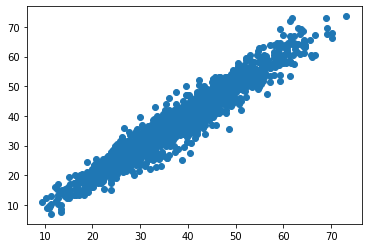

In [ ]:
df_soybean=df_data.drop(["Value_corn","County"],axis=1)
df_soybean.dropna(inplace=True)
df_soybean_X=df_soybean.drop("Value_soybean",axis=1)
X_train_soybean, X_test_soybean, y_train_soybean, y_test_soybean = train_test_split(
    df_soybean_X[["Year","Latitude","Longitude","GDD","SeasonalPrep","SeasonalTmax","DaysB10"]],
    df_soybean["Value_soybean"], test_size=0.30, random_state=42)
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train_soybean, y_train_soybean)
plt.scatter(clf.predict(X_test_soybean),y_test_soybean)

In [ ]:
y_pred_soybean=clf.predict(X_test_soybean)
r2_score(y_test_soybean, y_pred_soybean)

# Checking R2_score for yield after 2010

# x, y =[], []
# for i in range(len(y_test_soybean)):
#   if X_test_soybean.iloc[i]['Year'] > 2010:
#     # print(X_test_soybean.iloc[i]['Year'],y_test_soybean.iloc[i], "%0.1f" % y_pred_soybean[i])
#     x.append(y_test_soybean.iloc[i])
#     y.append(y_pred_soybean[i])
#     # plt.scatter(y_test_soybean.iloc[i],y_pred_soybean[i])
# r2_score(y_test_soybean, y_pred_soybean), r2_score(x, y)

0.9304820396979142

## Gradient Boosting Regression Model for Corn with Lat/Lon as Variable

In [ ]:
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
df_corn=df_data.drop(["Value_soybean","County"],axis=1)
df_corn.dropna(inplace=True)
df_corn_X=df_corn.drop("Value_corn",axis=1)
X_train_corn, X_test_corn, y_train_corn, y_test_corn = train_test_split(
    df_corn_X[["Year","Latitude","Longitude","GDD","SeasonalPrep","SeasonalTmax","DaysB10"]],
    df_corn["Value_corn"], test_size=0.30, random_state=42)
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train_corn, y_train_corn)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

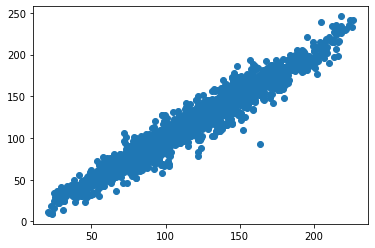

In [ ]:
plt.scatter(clf.predict(X_test_corn),y_test_corn)

In [ ]:
y_pred_corn=clf.predict(X_test_corn)
r2_score(y_test_corn, y_pred_corn)

0.9487180448196256

# Cross Validation GB

For Corn

In [ ]:
kf = KFold(n_splits=5,shuffle=False)

params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
df_corn=df_data.drop(["Value_soybean","County"],axis=1)
df_corn.dropna(inplace=True)
df_corn_X=df_corn.drop("Value_corn",axis=1)

X = df_corn_X[["Year","Latitude","Longitude","GDD","SeasonalPrep","SeasonalTmax","DaysB10"]]
y = df_corn["Value_corn"]
accuracy = []

for train_index, test_index in kf.split(df_corn):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  accuracy.append(r2_score(y_test, y_pred))

accuracy



[0.926946708999173,
 0.9269607497499321,
 0.9313602270628407,
 0.9350354583234399,
 0.9466104208922493]

For Soybean

In [ ]:
kf = KFold(n_splits=5,shuffle=False)

params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 3,
          'learning_rate': 0.1, 'loss': 'ls'}
df_soybean=df_data.drop("Value_corn",axis=1)
df_soybean.dropna(inplace=True)
df_soybean_X=df_soybean.drop("Value_soybean",axis=1)

X=df_soybean_X[["Year","Latitude","Longitude","GDD","SeasonalPrep","SeasonalTmax","DaysB10"]]
y=df_soybean['Value_soybean']
accuracy = []

for train_index, test_index in kf.split(df_soybean):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  clf = ensemble.GradientBoostingRegressor(**params)
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  accuracy.append(r2_score(y_test, y_pred))

accuracy



[0.8948023979349798,
 0.9036699258399945,
 0.90802543829677,
 0.9227730318264802,
 0.9242963760034762]